### Exercício 1

Vamos alterar nosso GrafoLA para que suporte pesos nas arestas, criando uma nova classe chamada GrafoLAComPesos

In [ ]:
# classe GrafoLAComPesos
#   def adiciona_aresta(self, n1, n2, peso=1, mao_dupla=True):

### Exercício 2

Para o grafo da figura abaixo, apresente a sequência de vertices após a aplicação da BFS e da DFS a partir do
vértice 7.

Utilize a classe GrafoLA para o problema.

<img src=https://objectstorage.us-ashburn-1.oraclecloud.com/n/ida8x1uljntv/b/graph_images_ada/o/grafo_1.png width=300>

In [ ]:
# Resolução

### Exercício 3

Para o grafo da figura abaixo, apresente a sequência de vertices após a aplicação da DFS a partir do
vértice 7.

Utilize a classe GrafoLA para o problema.

<img src=https://objectstorage.us-ashburn-1.oraclecloud.com/n/ida8x1uljntv/b/graph_images_ada/o/grafo_2.png width=300>

In [ ]:
# Resolução


### Exercício 4

A partir do arquivo `casa_madeira.csv`, construa um grafo que modele as tarefas necessárias para construir uma casa de madeira.

Utilize o **networkx** para resolver o problema, e utilize o **pandas** pra importar o arquivo.

**Não utilizar as classes GrafoLA e GrafoLAComPesos**

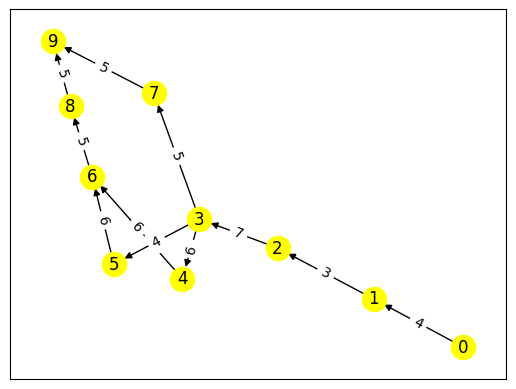

In [5]:
# Resolução

import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv('casa_madeira.csv')

grafo_casa = nx.DiGraph()
numpy_df = dataframe.to_numpy()
nos = []
for linha in numpy_df:
    if '_' in linha[2]:
        dependencias = linha[2].split('_')
        for aresta in dependencias:
            nos.append((int(aresta),int(linha[0]),linha[3]))
    else:
        nos.append((int(linha[2]),int(linha[0]),linha[3]))

grafo_casa.add_weighted_edges_from(nos)


pos = nx.spring_layout(grafo_casa, seed=28)
nx.draw_networkx(grafo_casa, pos, node_color="yellow")

labels = nx.get_edge_attributes(grafo_casa, 'weight')
nx.draw_networkx_edge_labels(grafo_casa, pos, edge_labels=labels)

plt.show()

<img src=https://objectstorage.us-ashburn-1.oraclecloud.com/n/ida8x1uljntv/b/graph_images_ada/o/casa_madeira.png width=500>

### Exercício 5

Considere o labirinto apresentado na figura a seguir. Este é um problema trivial que muitos de nós humanos resolvemos a título de entretenimento. No entanto ele se apresenta como um problema
complexo para um computador resolver.

De que forma o computador pode transportar o labirinto para uma representação computacional adequada, a fim de encontrar o caminho da entrada até a estrela?

Ajude o computador, modelando o labirinto como um grafo (de que tipo?) e resolva o problema encontrando o menor caminho entre a entrada do labirinto e a estrela.

<img src=https://objectstorage.us-ashburn-1.oraclecloud.com/n/ida8x1uljntv/b/graph_images_ada/o/labirinto.png width=500>

Utilize o **networkx** para resolver o problema.

**Não utilizar as classes GrafoLA e GrafoLAComPesos**

<img src=https://objectstorage.us-ashburn-1.oraclecloud.com/n/ida8x1uljntv/b/graph_images_ada/o/problema_labirinto_grafo.png width=800>

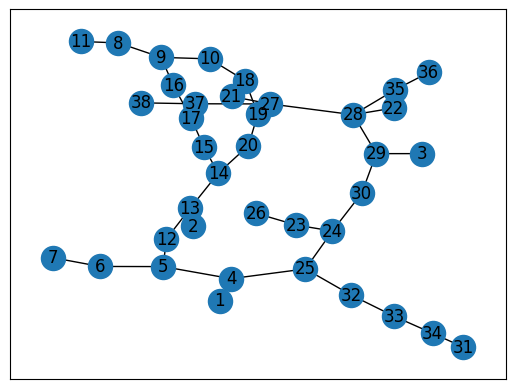

In [6]:
# Resolução
import networkx as nx
import numpy as np
import scipy as sp

labirinto = nx.Graph()

for i in range(1,39):
    labirinto.add_node(i)

# Entradas do labirinto
labirinto.add_edge(1,4)
labirinto.add_edge(2,13)
labirinto.add_edge(3,29)

# Chegadas na estrela do labirinto
labirinto.add_edge(15,17)
labirinto.add_edge(16,17)

# Caminhos
labirinto.add_edge(4,5)
labirinto.add_edge(4,25)

labirinto.add_edge(5,6)
labirinto.add_edge(5,12)

labirinto.add_edge(6,7)

labirinto.add_edge(8,9)
labirinto.add_edge(8,11)

labirinto.add_edge(9,10)
labirinto.add_edge(9,16)

labirinto.add_edge(10,18)

labirinto.add_edge(12,13)

labirinto.add_edge(13,14)

labirinto.add_edge(14,15)
labirinto.add_edge(14,20)

labirinto.add_edge(18,19)

labirinto.add_edge(19,20)

labirinto.add_edge(21,27)

labirinto.add_edge(22,28)

labirinto.add_edge(23,24)
labirinto.add_edge(23,26)

labirinto.add_edge(24,25)
labirinto.add_edge(24,30)

labirinto.add_edge(25,32)

labirinto.add_edge(27,28)
labirinto.add_edge(27,37)

labirinto.add_edge(28,29)
labirinto.add_edge(28,35)

labirinto.add_edge(29,30)

labirinto.add_edge(31,34)

labirinto.add_edge(32,33)

labirinto.add_edge(33,34)

labirinto.add_edge(35,36)

labirinto.add_edge(37,38)

# Imprime lista de adjacencia
# m1 = nx.adjacency_matrix(labirinto)
# print(m1)

# Imprime matriz de adjacencia
# m1 = nx.adjacency_matrix(labirinto).todense()
# print(m1)

nx.draw_networkx(labirinto)


In [7]:
# Todos os percursos entre a entrada 1 e o centro do labirinto
[path for path in nx.all_simple_paths(labirinto, 1, 17)]

[[1, 4, 5, 12, 13, 14, 15, 17],
 [1, 4, 5, 12, 13, 14, 20, 19, 18, 10, 9, 16, 17]]

In [8]:
# Todos os percursos entre a entrada 2 e o centro do labirinto
[path for path in nx.all_simple_paths(labirinto, 2, 17)]

[[2, 13, 14, 15, 17], [2, 13, 14, 20, 19, 18, 10, 9, 16, 17]]

In [9]:
# Todos os percursos entre a entrada 3 e o centro do labirinto
[path for path in nx.all_simple_paths(labirinto, 3, 17)]

[[3, 29, 30, 24, 25, 4, 5, 12, 13, 14, 15, 17],
 [3, 29, 30, 24, 25, 4, 5, 12, 13, 14, 20, 19, 18, 10, 9, 16, 17]]

In [10]:
# Menor caminho entre a entrada 1 e o centro do labirinto
[path for path in nx.all_shortest_paths(labirinto, 1, 17)]

[[1, 4, 5, 12, 13, 14, 15, 17]]

In [12]:
# Menor caminho entre a entrada 2 e o centro do labirinto
[path for path in nx.all_shortest_paths(labirinto, 2, 17)]

[[2, 13, 14, 15, 17]]

In [13]:
# Menor caminho entre a entrada 3 e o centro do labirinto
[path for path in nx.all_shortest_paths(labirinto, 3, 17)]

[[3, 29, 30, 24, 25, 4, 5, 12, 13, 14, 15, 17]]